In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [14]:
data1 = h5py.File('myout_0_05.hdf5','r')
data2 = h5py.File('myout_org_0_05.hdf5','r')
data_3D1 = np.array(data1['pos'])
data_3D2 = np.array(data2['pos'])
data_new1 = data_3D1.reshape((1000000,5))
data_new2 = data_3D2.reshape((1000000,4))
data_3D1_col_rm = data_new1[:,:4]
print(data_new1)
#print(data_new2)

[[-2.9895401e+00 -4.9410005e+00  1.7124712e+01  4.1067204e+01
   5.6203735e-01]
 [ 2.2425351e+00  8.7806916e-01  4.4092689e+00  7.5455093e+01
   5.5102015e-01]
 [ 4.6275291e-01 -3.2286253e+00  1.8445612e+01  5.2983143e+01
   7.2043270e-01]
 ...
 [ 1.9223292e+00 -1.0096707e+00  5.5541177e+00  6.5641464e+01
   5.6997195e-02]
 [ 1.9215834e+00 -6.6001213e-01  7.1432376e+00  6.7325684e+01
   5.8228191e-02]
 [ 2.7746952e+00 -1.4070044e+00  1.3122143e+01  5.8683743e+01
   7.6455331e-01]]


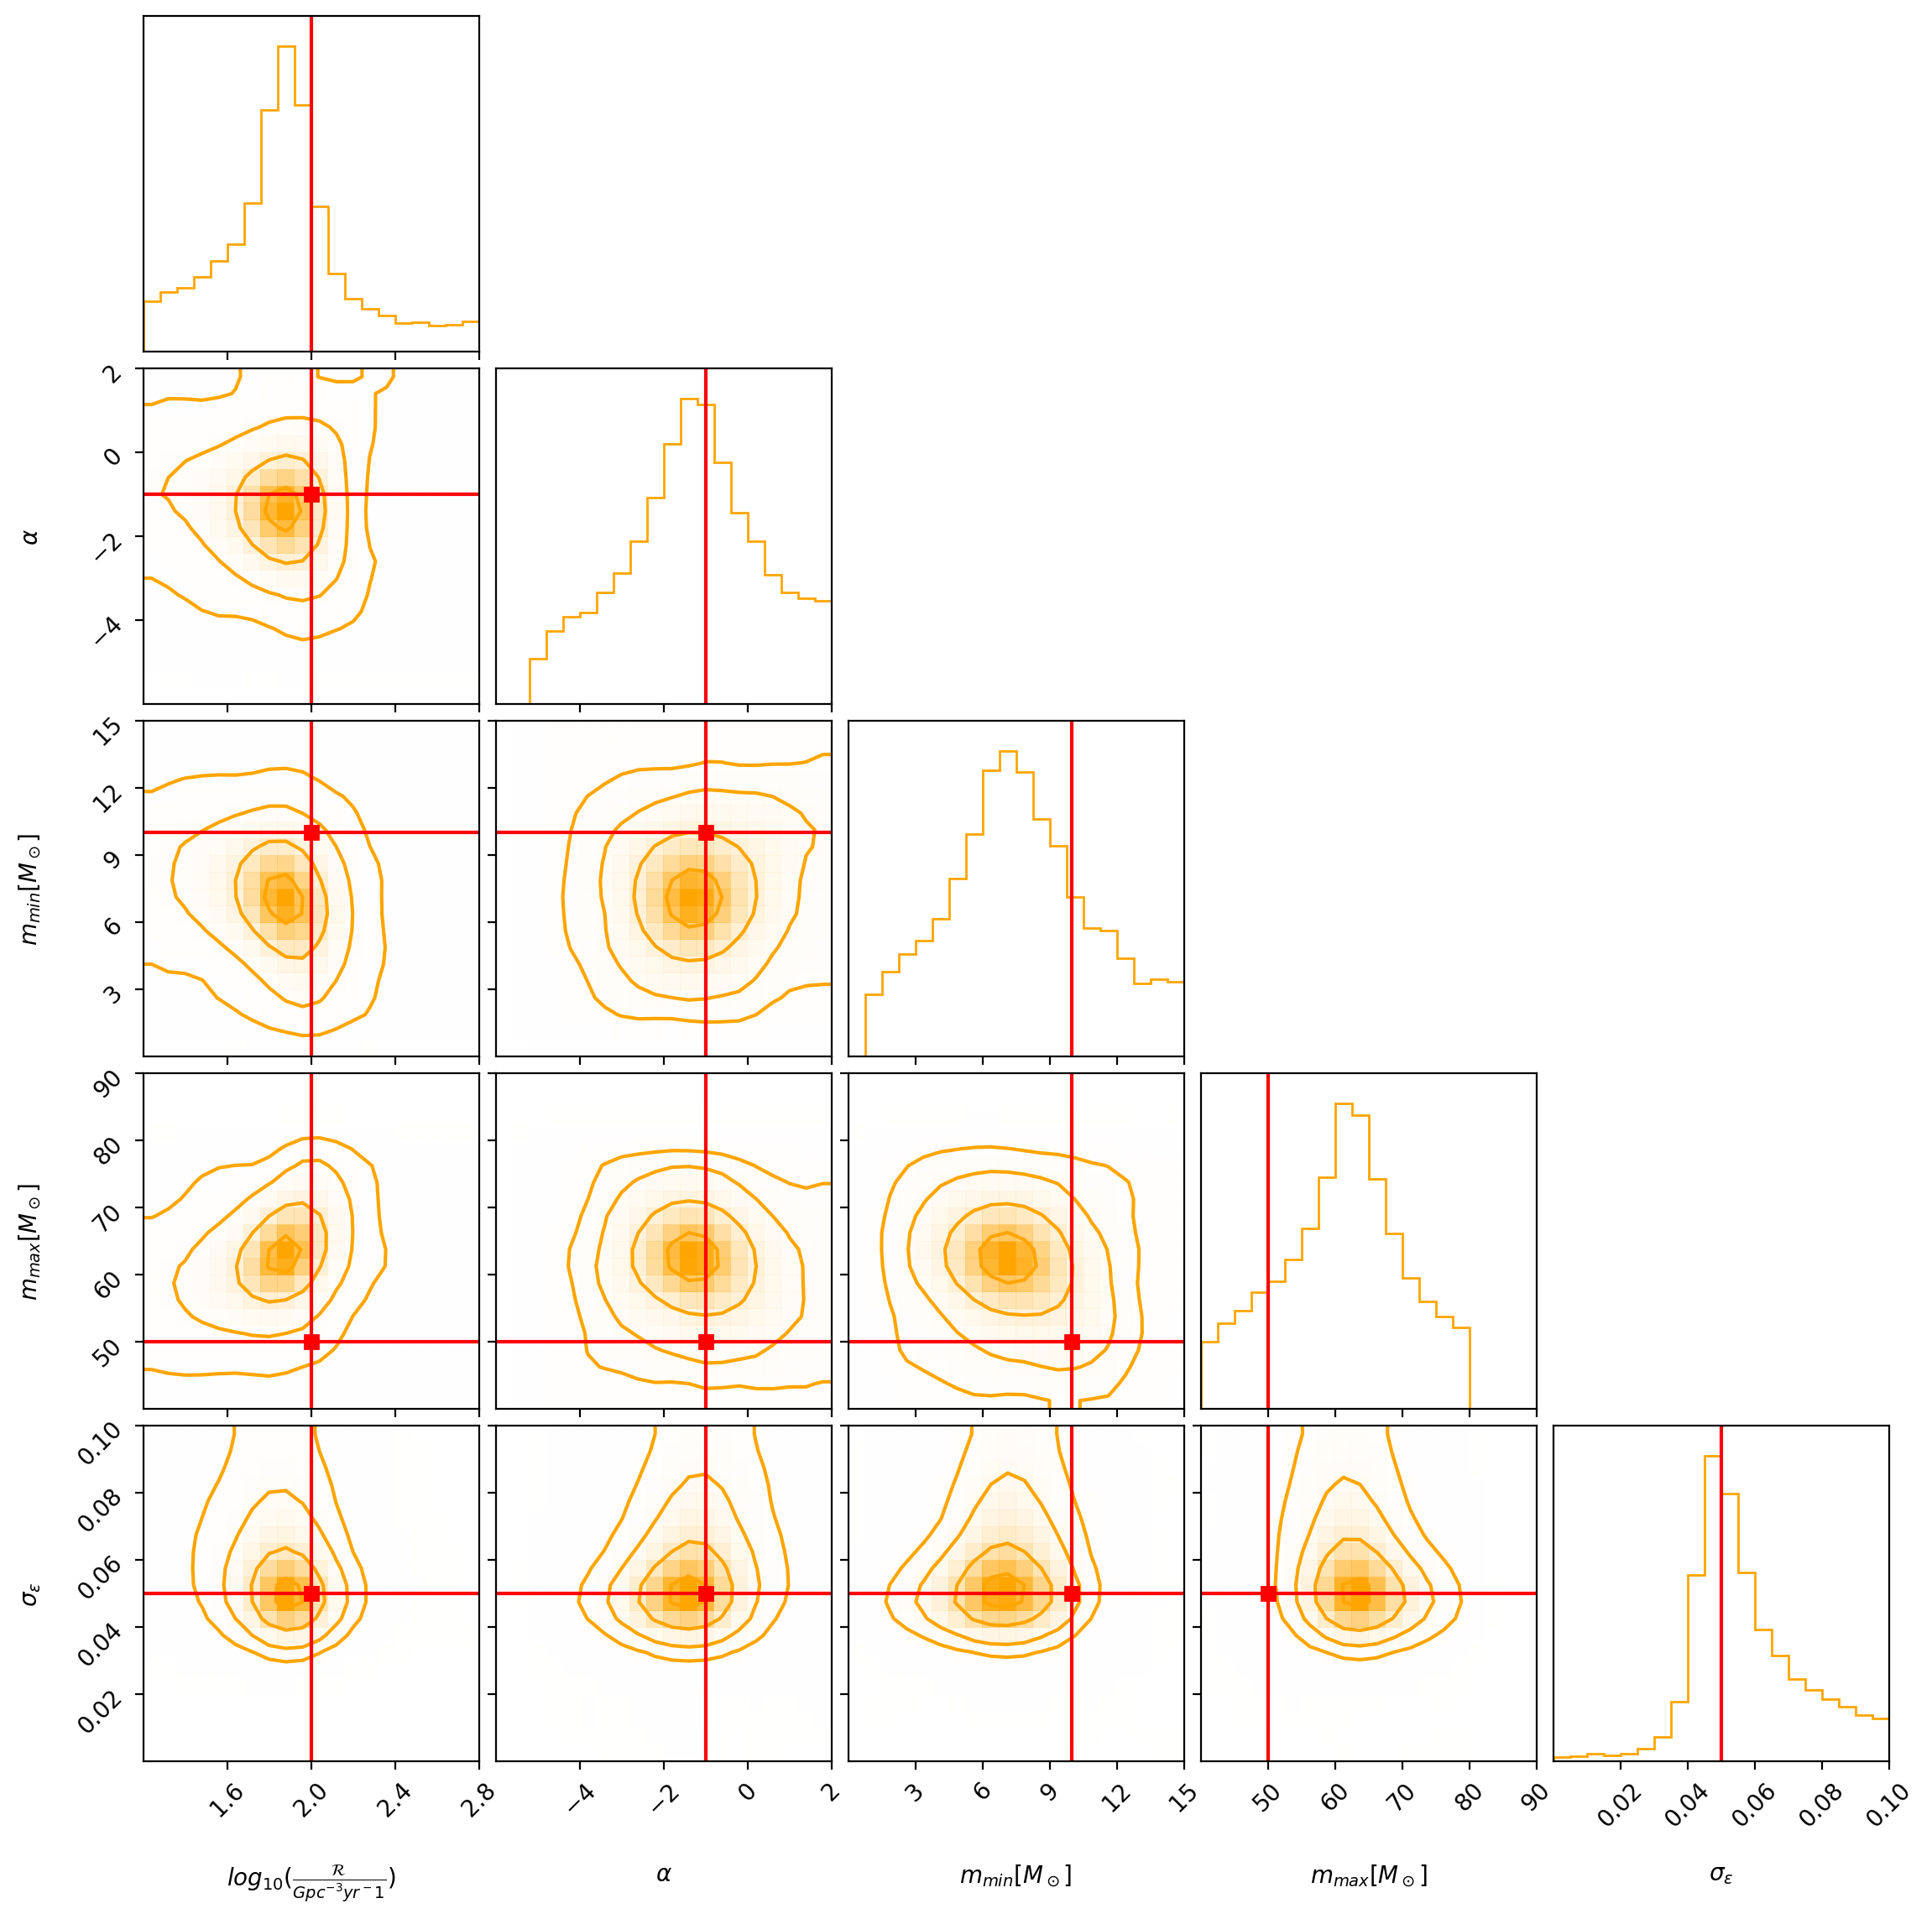

In [3]:
labels=[r"$log_{10}(\frac{\mathcal{R}}{Gpc^{-3}yr^-1})$", r"$\alpha$", r"$m_{min} [M_\odot$]",r"$m_{max} [M_\odot]$",
        "$\sigma_\epsilon$"]

limits = [(1.2, 2.8),(-6,2),(0,15),(40,90),(0,0.1)]
# Calculate the mean values along each dimension
mean_values1 = np.mean(data_new1, axis=0)
#provide true values if any
truth_values = [2, -1, 10, 50, 0.05]
#plotting the corner plot
figure1 = corner.corner(data_new1,labels=labels
                      ,show_titles=False,plot_datapoints=False,color='orange',
                        truths=truth_values,truth_color='red',range=limits,smooth=True)

#legend_texts = ["Mean Value"]  # Example legend texts
#legend_colors = ["red"]  # Example legend colors
#legend_handles = [plt.Line2D([], [], color=color, linewidth=2) for color in legend_colors]
#figure1.legend(legend_handles, legend_texts, loc='upper right')

#Plot reference lines for mean values
#axes = np.array(figure1.axes).reshape((len(labels), len(labels)))

#for i in range(len(labels)):
#    for j in range(i):
#        ax = axes[i, j]
#        ax.axvline(truth_values[j], color='green')
#        ax.axhline(truth_values[i], color='green')


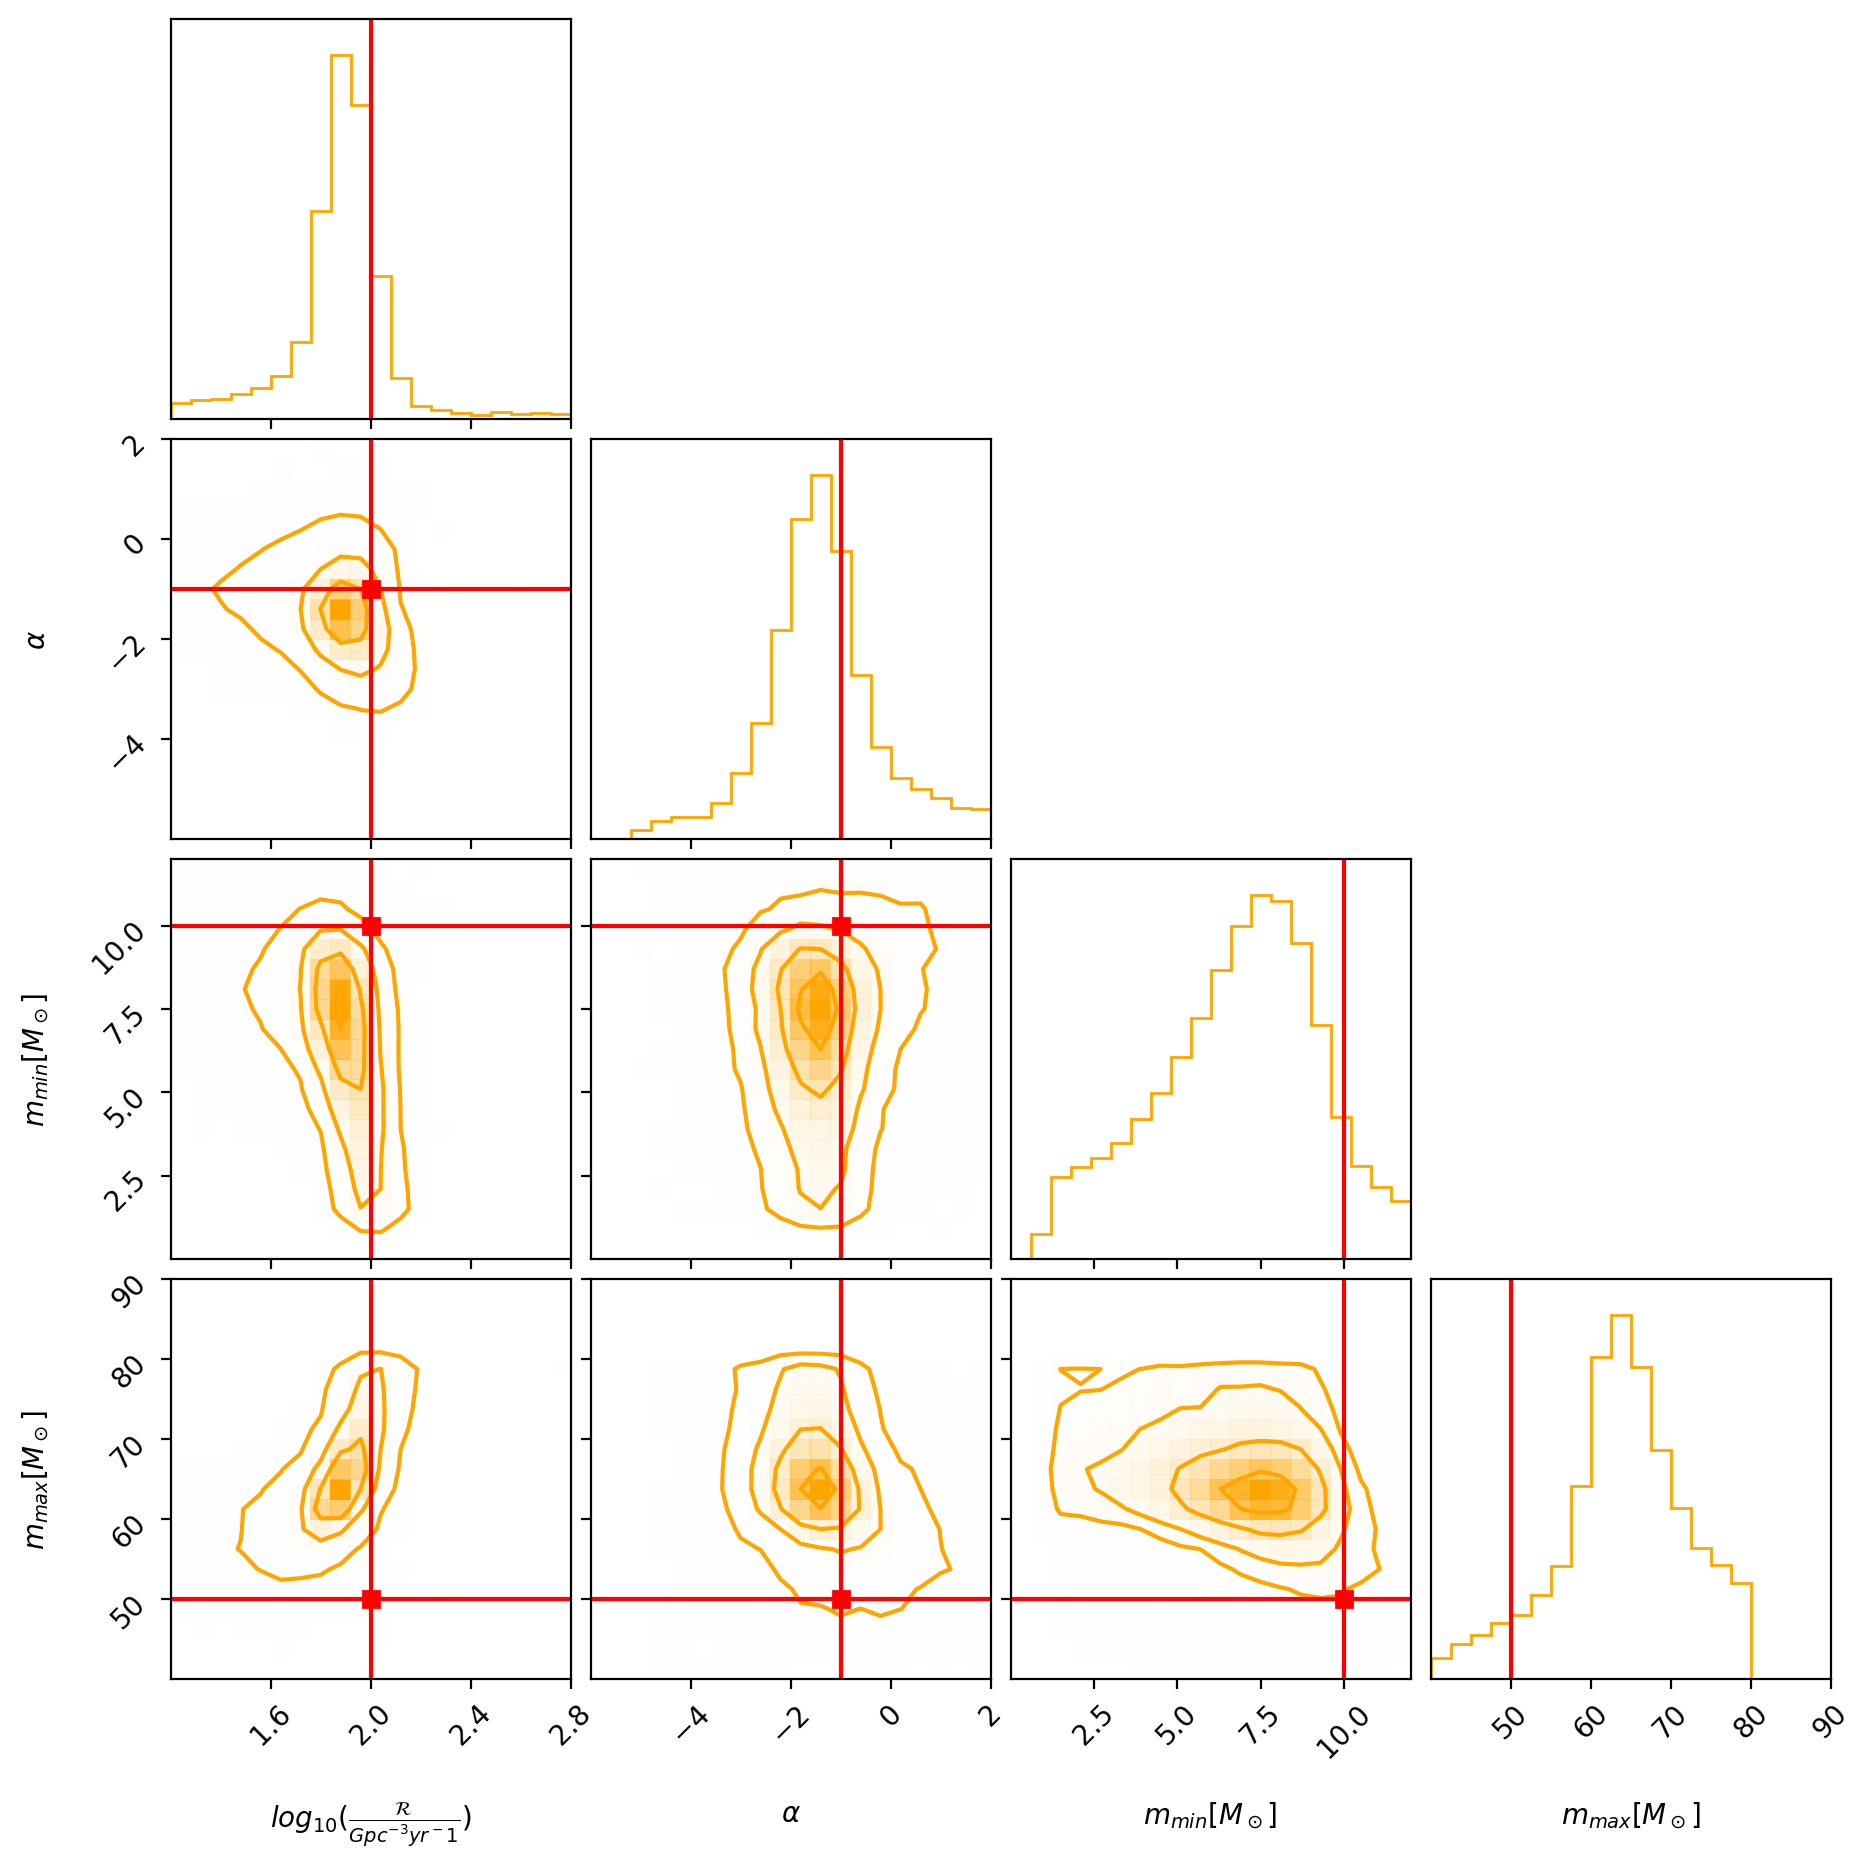

In [15]:
labels0=[r"$log_{10}(\frac{\mathcal{R}}{Gpc^{-3}yr^-1})$", r"$\alpha$", r"$m_{min} [M_\odot]$",r"$m_{max} [M_\odot]$"]
limits0 = [(1.2, 2.8),(-6,2),(0,12),(40,90)]

truth_values1 = [2, -1, 10, 50]
#plotting the corner plot
figure2 = corner.corner(data_new2,labels=labels0
                      ,show_titles=False,plot_datapoints=False,color='orange',
                        truths=truth_values1,truth_color='red',range=limits0)
    

In [5]:
corner.corner(data_new1_col,fig=figure2,labels=labels0
                      ,show_titles=False,plot_datapoints=False,color='black'
              ,truths=truth_values1,truth_color='red',range=limits0)

#legend_texts = ["EBBHs", "BBHS","True Value"]  
#legend_colors = ["black", "orange", "red"] 
#legend_handles = [plt.Line2D([],[], color=color, linewidth=2) for color in legend_colors]
#figure2.legend(legend_handles, legend_texts, loc='upper right')

#figure2.savefig("cor_0.05.png")

### We may be able to combine corner plots with eccentricity. But we do need to add the extra dimension without any data into it.

In [6]:
# Create an empty column (filled with None values)
#new_column = np.full((100, 10000, 1), None, dtype=object)
#new_column = np.zeros((100, 10000, 1))
new_column = np.random.randint(0, 10, size=(100, 10000, 1))

# Concatenate the new column with the 3D array along the last axis (axis=2)
data_3D2_col_add = np.concatenate((data_3D2, new_column), axis=2)
data_new3 = data_3D2_col_add.reshape((1000000,5))
#print(data_3D2_col_add)

In [7]:
#data_3D2_col_add[:,:,4] = None
#print(data_3D2_col_add)

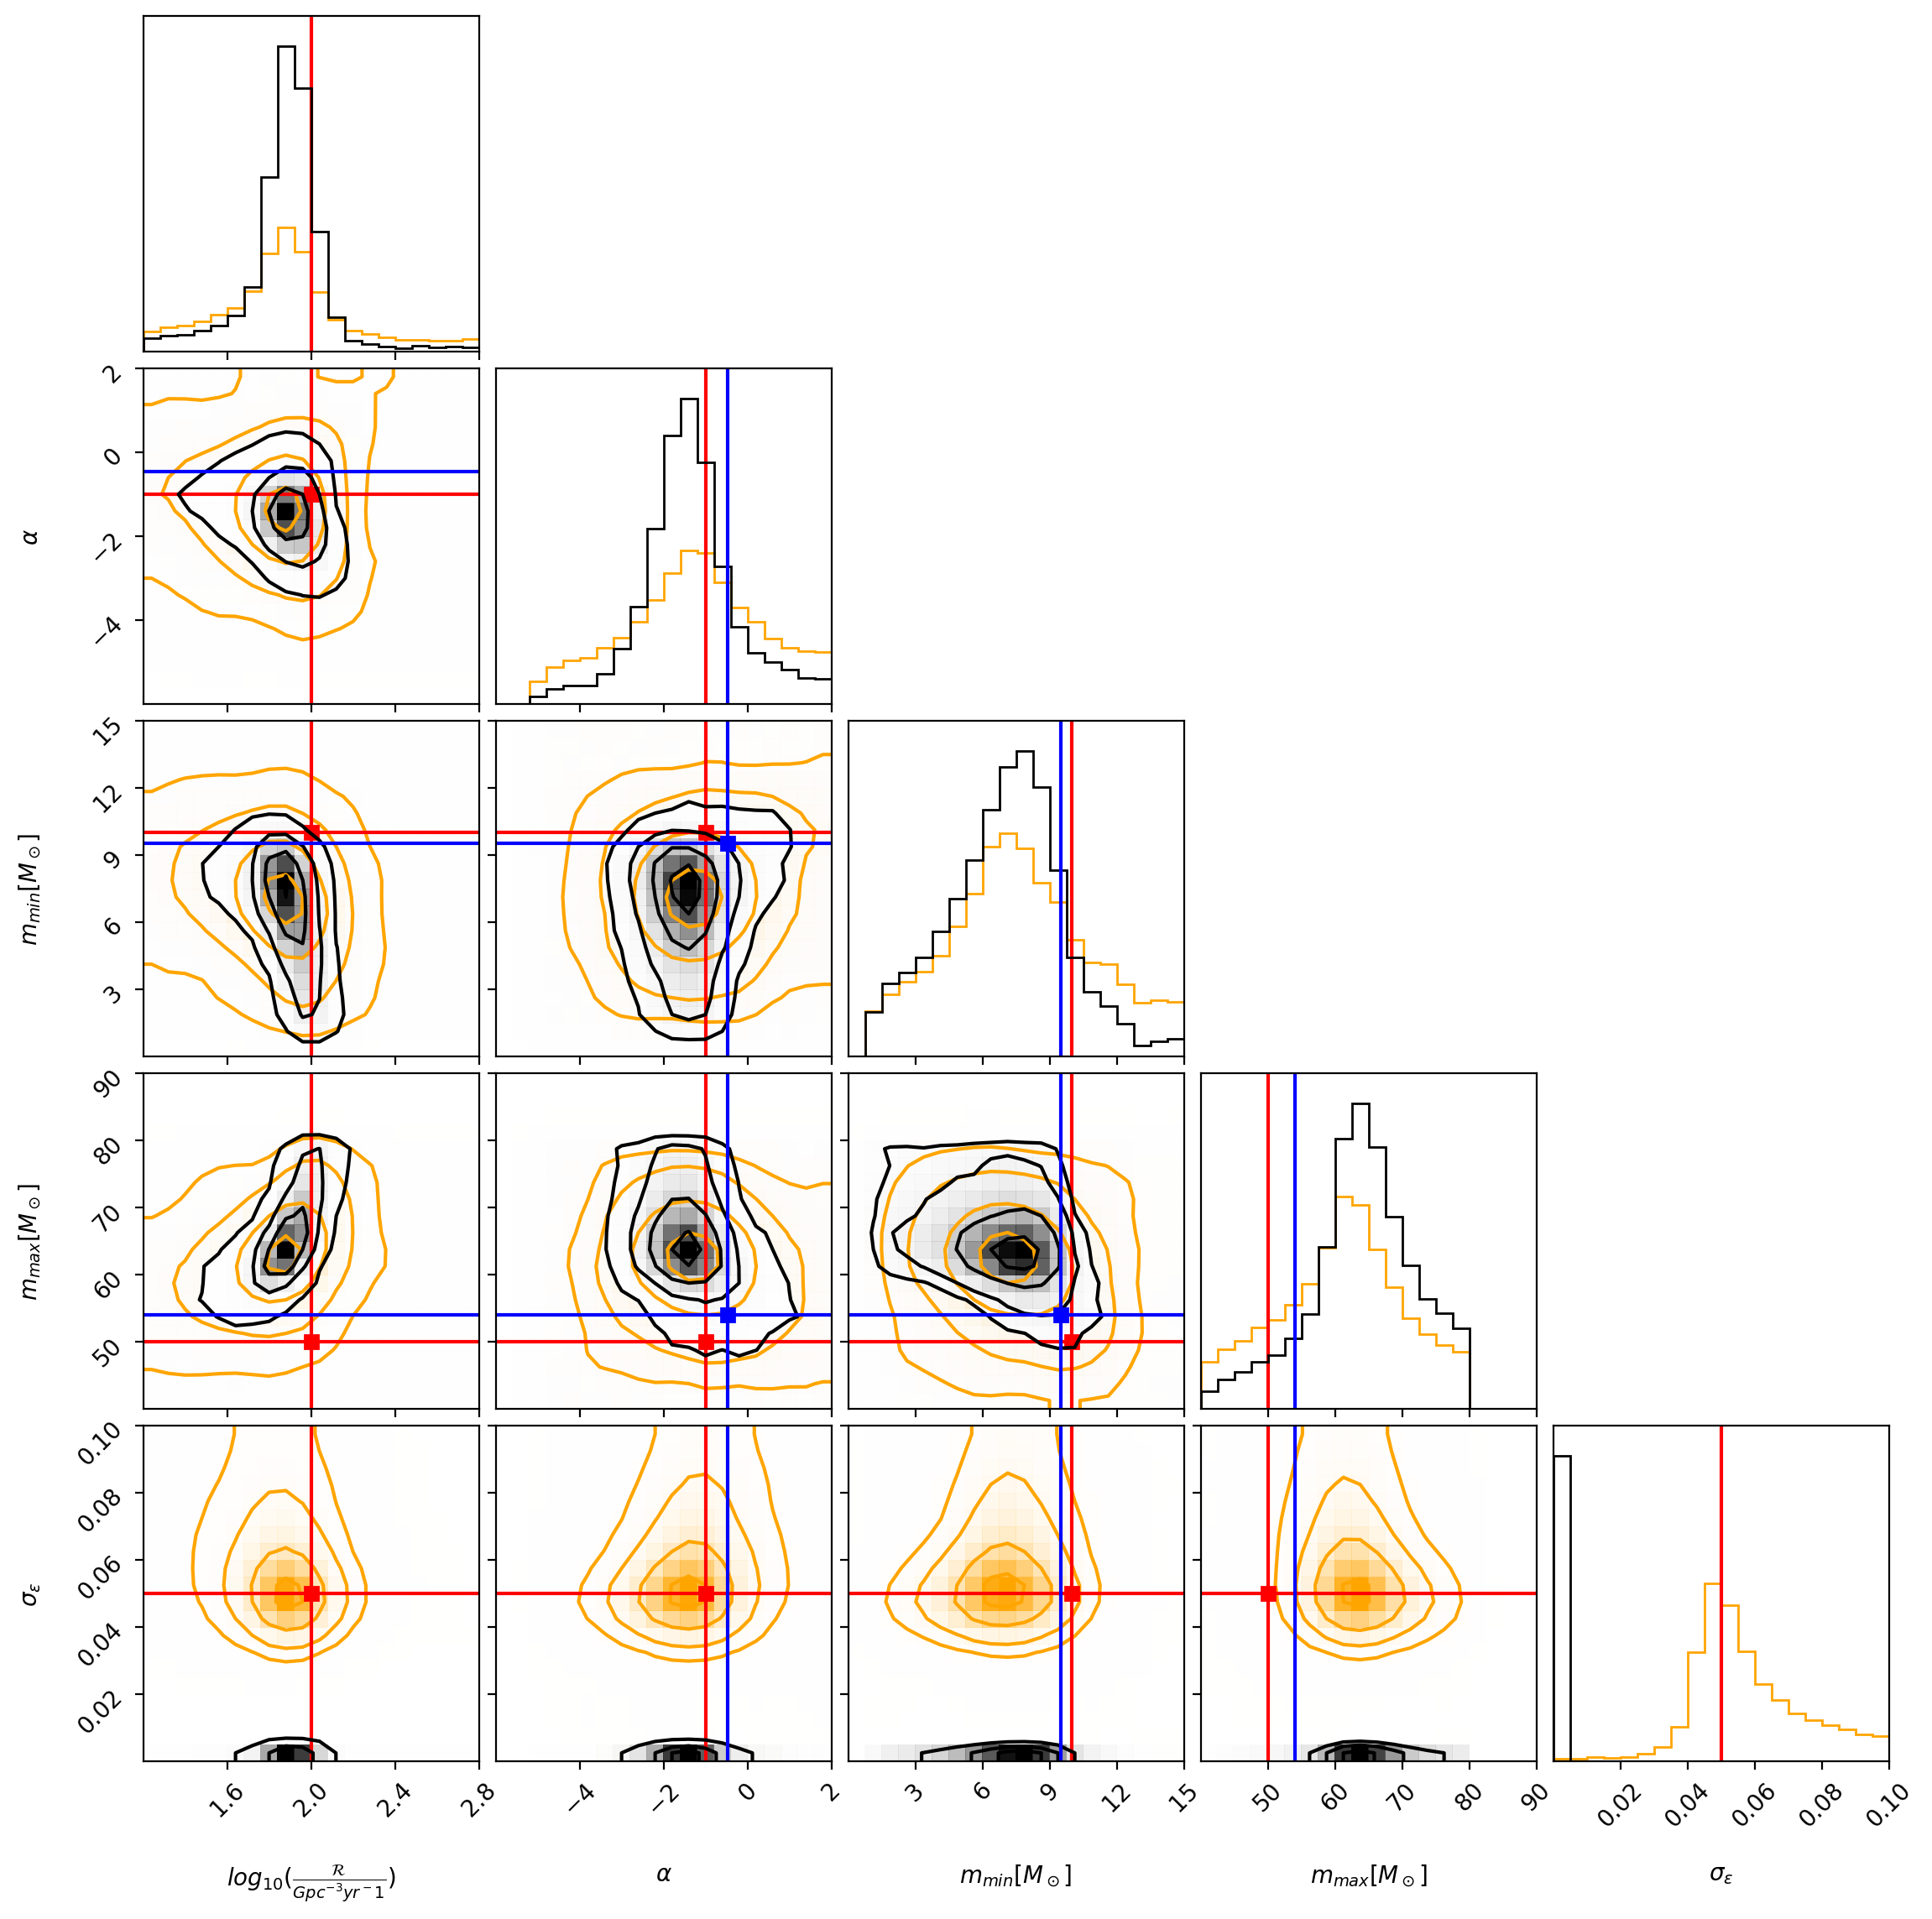

In [8]:
corner.corner(data_new3,fig=figure1,labels=labels
                      ,show_titles=False,plot_datapoints=False,color='black'
              ,truths=mean_values1,truth_color='blue',range=limits)
#figure1.savefig("com_0.2_ecc.png")